In [1]:
import random
import time
import copy
import matplotlib.pyplot as plt
%matplotlib inline

#  sorting algorithms

In [2]:
def gen_rand_int(n):
    """
    generate random int array
    """
    arr = []
    for i in range(n):
        arr.append(random.randint(1,n))
    return arr

def timer(func):
    """
    timing decoration function
    """
    def wrap(*args):
        t0 = time.perf_counter()
        res = func(*args)
        t1 = time.perf_counter()
        cost = (t1-t0)
        print(f"time: {cost:0.4f} sec")
        return func.__name__, cost
    return wrap

@timer
def bubble_sort(arr):
    print('use bubble sort ...')
    for i in range(0, len(arr)):
        for j in range(1, len(arr)):
            if(arr[j] < arr[j-1]):
                arr[j], arr[j-1] = arr[j-1], arr[j]

@timer
def bubble_sort2(arr):
    print('use optimized bubble sort ...')
    for i in range(0, len(arr)):
        for j in range(1, len(arr)-i):
            if(arr[j] < arr[j-1]):
                arr[j], arr[j-1] = arr[j-1], arr[j]

@timer
def quick_sort(arr):
    print('use quick sort ...')
    s = []
    s.append((0, len(arr)))
    while(len(s)>0):
        e = s.pop()
        start, end = e[0], e[1]
        left, right = start, end-1
        pivot = arr[left]
        while(left < right):
            while (arr[right] >= pivot) & (left < right):
                right -= 1
            arr[left] = arr[right]
            while (arr[left] <= pivot) & (left < right):
                left += 1
            arr[right] = arr[left]
        arr[left] = pivot
        if (right-start) > 1:
            s.append((start, right+1))
        if (end - left) > 1:
            s.append((left+1, end))

@timer
def native_sort(arr):
    print('use python native sort ...')
    arr.sort()

In [3]:
arr1 = gen_rand_int(100)
arr2 = copy.copy(arr1)
arr3 = copy.copy(arr1)
arr4 = copy.copy(arr1)
# different ids of arrays represent different objects
print(id(arr1),id(arr2),id(arr3), id(arr4))

2023866087688 2023866087560 2023866087112 2023866087048


In [4]:
print('before sort:')
print('', arr1[:10], '\n', arr2[:10], '\n', arr3[:10], '\n', arr4[:10])

res1 = bubble_sort(arr1)
res2 = bubble_sort2(arr2)
res3 = quick_sort(arr3)
res4 = native_sort(arr4)

print('after sort:')
print('', arr1[:10], arr1[-10:], '\n', arr2[:10], arr2[-10:], '\n', arr3[:10], arr3[-10:], '\n', arr4[:10], arr4[-10:])

before sort:
 [11, 9, 87, 44, 1, 45, 57, 48, 50, 43] 
 [11, 9, 87, 44, 1, 45, 57, 48, 50, 43] 
 [11, 9, 87, 44, 1, 45, 57, 48, 50, 43] 
 [11, 9, 87, 44, 1, 45, 57, 48, 50, 43]
use bubble sort ...
time: 0.0009 sec
use optimized bubble sort ...
time: 0.0005 sec
use quick sort ...
time: 0.0002 sec
use python native sort ...
time: 0.0000 sec
after sort:
 [1, 2, 2, 6, 7, 8, 9, 9, 11, 12] [94, 96, 96, 96, 97, 97, 99, 99, 99, 100] 
 [1, 2, 2, 6, 7, 8, 9, 9, 11, 12] [94, 96, 96, 96, 97, 97, 99, 99, 99, 100] 
 [1, 2, 2, 6, 7, 8, 9, 9, 11, 12] [94, 96, 96, 96, 97, 97, 99, 99, 99, 100] 
 [1, 2, 2, 6, 7, 8, 9, 9, 11, 12] [94, 96, 96, 96, 97, 97, 99, 99, 99, 100]


Text(0, 0.5, 'Time (sec)')

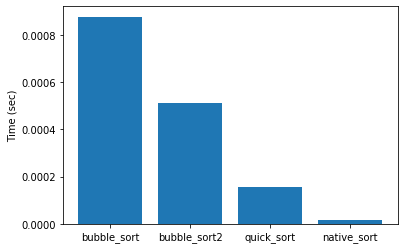

In [5]:
res = [res1, res2, res3, res4]
categories = [i[0] for i in res]
seconds = [i[1] for i in res]
plt.bar(categories, seconds)
plt.ylabel('Time (sec)')

# binary search

In [6]:
def timer2(func):
    """
    timing decoration function
    """
    def wrap(*args):
        t0 = time.perf_counter()
        res = func(*args)
        t1 = time.perf_counter()
        cost = (t1-t0)
        print(f"time: {cost:0.4f} sec")
        return res, func.__name__, cost
    return wrap

@timer2
def b_search(arr, n):
    """
    binary search is based on a sorted array
    """
    print('using binary search ...')
    start = 0
    end = len(arr) - 1
    while(start <= end):
        mid = (start + end) // 2
        if (arr[mid] < n):
            start = mid + 1
        elif (arr[mid] > n):
            end = mid - 1
        else:
            return mid

@timer2
def traverse_search(arr, n):
    print('using traverse search ...')
    for i, d in enumerate(arr):
        if d == n:
            return i

@timer2
def native_search(arr, n):
    print('using native search ...')
    return arr.index(n)

In [7]:
arr = gen_rand_int(1000)
quick_sort(arr)
for i in range(1, 1000, 100):
    res = b_search(arr, i)
    idx = res[0]
    if idx is not None:
        print('√ search:', i, 'index:', idx, f'arr[{idx}]:', arr[idx])
    else:
        print('× search:', i, 'index:', idx)
    print()

use quick sort ...
time: 0.0028 sec
using binary search ...
time: 0.0000 sec
√ search: 1 index: 0 arr[0]: 1

using binary search ...
time: 0.0000 sec
√ search: 101 index: 96 arr[96]: 101

using binary search ...
time: 0.0000 sec
× search: 201 index: None

using binary search ...
time: 0.0000 sec
√ search: 301 index: 281 arr[281]: 301

using binary search ...
time: 0.0000 sec
√ search: 401 index: 386 arr[386]: 401

using binary search ...
time: 0.0000 sec
√ search: 501 index: 503 arr[503]: 501

using binary search ...
time: 0.0000 sec
× search: 601 index: None

using binary search ...
time: 0.0000 sec
√ search: 701 index: 709 arr[709]: 701

using binary search ...
time: 0.0000 sec
√ search: 801 index: 799 arr[799]: 801

using binary search ...
time: 0.0000 sec
× search: 901 index: None



In [8]:
n = 10000
arr = [i for i in range(n)]
print(arr[:10],arr[-10:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999]


In [9]:
target = random.randint(1,n)
res1 = b_search(arr, target)
res2 = native_search(arr, target)
res3 = traverse_search(arr, target)

using binary search ...
time: 0.0000 sec
using native search ...
time: 0.0001 sec
using traverse search ...
time: 0.0003 sec


Text(0, 0.5, 'Time (sec)')

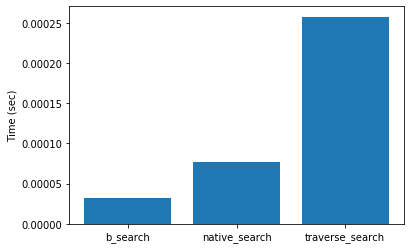

In [10]:
res = [res1, res2, res3]
categories = [i[1] for i in res]
seconds = [i[2] for i in res]
plt.bar(categories, seconds)
plt.ylabel('Time (sec)')